In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
# from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv("../data/komatsu_newsscraping.csv")
df.shape

(65, 3)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      65 non-null     object
 1   제목      65 non-null     object
 2   본문      65 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


날짜 전처리

In [4]:
date1 = df['날짜'].str.split(',').tolist()
df2 = pd.DataFrame(date1, columns=['날짜','년도'])
df2['년도'] = df2['년도'].str.strip()
df2['날짜'] = df2['날짜'].str.strip()
df2['날짜2'] = df2['날짜'].str.replace('.',' ')
df2['날짜2'] = df2['날짜2'].str.replace('  ',' ')
date2 = df2['날짜2'].str.split(' ',expand=True)
df2

/var/folders/ch/_vjmtbq95rqfjrmkw7sjcsd80000gn/T/ipykernel_2334/1094315915.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['날짜2'] = df2['날짜'].str.replace('.',' ')


,날짜,년도,날짜2
0,May 12,2022,May 12
1,Apr. 28,2023,Apr 28
2,April 28,2023,April 28
3,Apr. 28,2023,Apr 28
4,Apr.28,2023,Apr 28
...,...,...,...
60,Oct. 29,2021,Oct 29
61,Oct. 28,2021,Oct 28
62,Oct. 28,2021,Oct 28
63,Oct. 28,2021,Oct 28


In [5]:
df3 = pd.concat([df2, date2], axis=1)
df4 = df3[['년도',0,1]]
df4.columns = ['year','month','day']
df = pd.concat([df4, df[['제목','본문']]],axis=1)
df.head(1)

,year,month,day,제목,본문
0,2022,May,12,"-Accelerating to achieve safe, highly producti...",Komatsu Ltd. (President and CEO: Hiroyuki Og...


In [6]:
df['month'].unique()

array(['May', 'Apr', 'April', 'Mar', 'Feb', 'Jan', 'Dec', 'Nov', 'Oct',
       'Sep', 'July', 'Jul', 'June', 'March'], dtype=object)

In [7]:
month_dic = {'May':5, 'Apr':4, 'April':4, 'Mar':3, 'Feb':2, 'Jan':1, 'Dec':12, 'Nov':11, 'Oct':10,
       'Sep':9, 'July':7, 'Jul':7, 'June':6, 'March':3}

In [8]:
df['month'] = df['month'].replace(month_dic)
df.tail(1)

,year,month,day,제목,본문
64,2021,10,27,Proterra and Komatsu announce collaboration to...,"Proterra Inc, a leading innovator in commercia..."


In [9]:
df.dtypes

year     object
month     int64
day      object
제목       object
본문       object
dtype: object

In [10]:
df['date'] = df['year'].astype(str)+'-'+ df['month'].astype(str)+'-'+df['day'].astype(str)
df['date'] = pd.to_datetime(df['date'])
df.head()

,year,month,day,제목,본문,date
0,2022,5,12,"-Accelerating to achieve safe, highly producti...",Komatsu Ltd. (President and CEO: Hiroyuki Og...,2022-05-12
1,2023,4,28,Establishment of Subsidiary in the Republic of...,Komatsu Ltd. (President and CEO: Hiroyuki Ogaw...,2023-04-28
2,2023,4,28,Announcement Regarding Restricted Stock,Komatsu Ltd. (“Komatsu”) hereby announces with...,2023-04-28
3,2023,4,28,Notice: Difference between Non-consolidated Bu...,Komatsu Ltd. (President and CEO: Hiroyuki Ogaw...,2023-04-28
4,2023,4,28,Consolidated Business Results for the Fiscal Y...,Komatsu Ltd. today announced its consolidate...,2023-04-28


In [11]:
df['본문'] = df['본문'].str.split('No :').str[0]
# df['본문'].str.split('No :').str[1]

In [12]:
df['본문'] = df['본문'].str.split('Ltd.').str[1]

In [13]:
df['제목_low'] = df['제목'].str.lower()
df['본문_low'] = df['본문'].str.lower()
df.head()


,year,month,day,제목,본문,date,제목_low,본문_low
0,2022,5,12,"-Accelerating to achieve safe, highly producti...",(President and CEO: Hiroyuki Ogawa) has devel...,2022-05-12,"-accelerating to achieve safe, highly producti...",(president and ceo: hiroyuki ogawa) has devel...
1,2023,4,28,Establishment of Subsidiary in the Republic of...,(President and CEO: Hiroyuki Ogawa) will esta...,2023-04-28,establishment of subsidiary in the republic of...,(president and ceo: hiroyuki ogawa) will esta...
2,2023,4,28,Announcement Regarding Restricted Stock,(“Komatsu”) hereby announces with respect to ...,2023-04-28,announcement regarding restricted stock,(“komatsu”) hereby announces with respect to ...
3,2023,4,28,Notice: Difference between Non-consolidated Bu...,(President and CEO: Hiroyuki Ogawa) (hereafte...,2023-04-28,notice: difference between non-consolidated bu...,(president and ceo: hiroyuki ogawa) (hereafte...
4,2023,4,28,Consolidated Business Results for the Fiscal Y...,today announced its consolidated business res...,2023-04-28,consolidated business results for the fiscal y...,today announced its consolidated business res...


In [42]:
# df.to_csv('komatsu_text.csv', index=False)

In [14]:
stop_words = pd.read_csv("../data/stop_words.csv")
stop_words.tail(10)

,0
339,requirements
340,three
341,main
342,example
343,fully
344,enables
345,particularly
346,business
347,team
348,weight


In [15]:
stop_words_list = list(stop_words["0"])
stop_words_list.extend([" ", "s", "construction", "equipment", "machine", "volvo", "volvos", "ce","komatsu","hiroyuki","ogawa","president"])
stop_words_list

['a',
 'but',
 'during',
 'hows',
 "it's",
 'said',
 'this',
 'we’re',
 'who’ve',
 'about',
 'by',
 'each',
 'however',
 'it’s',
 'says',
 'those',
 "we've",
 'whove',
 'above',
 'can',
 'either',
 'i',
 'its',
 'see',
 'through',
 'we’ve',
 'will',
 'across',
 "can't",
 'for',
 "i'd",
 "let's",
 'she',
 'to',
 'weve',
 'with',
 'after',
 'can’t',
 'from',
 'i’d',
 'let’s',
 "she'd",
 'too',
 'were',
 'within',
 'all',
 'cant',
 'given',
 "i'll",
 'lets',
 'she’d',
 'towards',
 'what',
 'without',
 'along',
 'cannot',
 'had',
 'i’ll',
 'may',
 'shed',
 'under',
 "what's",
 "won't",
 'also',
 'could',
 'has',
 "i'm",
 'me',
 "she'll",
 'until',
 'what’s',
 'won’t',
 'am',
 "couldn't",
 'have',
 'i’m',
 'more',
 'she’ll',
 'us',
 'whats',
 'would',
 'an',
 'couldn’t',
 'having',
 'im',
 'most',
 'shell',
 'use',
 'when',
 "wouldn't",
 'and',
 'couldnt',
 'he',
 "i've",
 'much',
 'should',
 'used',
 "when's",
 'wouldn’t',
 'any',
 'did',
 "he'd",
 'i’ve',
 'must',
 'since',
 'uses',
 'whe

In [16]:
# 추가 된 단어 포함하여 update 하기
pd.Series(stop_words_list).to_csv("../data/stop_words.csv", index=False)

In [18]:
word = pd.read_csv("../data/stop_words.csv")
stop_words = word["0"].to_list()

In [22]:
df

,year,month,day,제목,본문,date,제목_low,본문_low
0,2022,5,12,"-Accelerating to achieve safe, highly producti...",(President and CEO: Hiroyuki Ogawa) has devel...,2022-05-12,"-accelerating to achieve safe, highly producti...",(president and ceo: hiroyuki ogawa) has devel...
1,2023,4,28,Establishment of Subsidiary in the Republic of...,(President and CEO: Hiroyuki Ogawa) will esta...,2023-04-28,establishment of subsidiary in the republic of...,(president and ceo: hiroyuki ogawa) will esta...
2,2023,4,28,Announcement Regarding Restricted Stock,(“Komatsu”) hereby announces with respect to ...,2023-04-28,announcement regarding restricted stock,(“komatsu”) hereby announces with respect to ...
3,2023,4,28,Notice: Difference between Non-consolidated Bu...,(President and CEO: Hiroyuki Ogawa) (hereafte...,2023-04-28,notice: difference between non-consolidated bu...,(president and ceo: hiroyuki ogawa) (hereafte...
4,2023,4,28,Consolidated Business Results for the Fiscal Y...,today announced its consolidated business res...,2023-04-28,consolidated business results for the fiscal y...,today announced its consolidated business res...
...,...,...,...,...,...,...,...,...
60,2021,10,29,Komatsu Agrees to Dissolve Shantui Constructio...,(hereafter “Komatsu”) (President & CEO: Hiroy...,2021-10-29,komatsu agrees to dissolve shantui constructio...,(hereafter “komatsu”) (president & ceo: hiroy...
61,2021,10,28,Notice: Dividends from Retained Earnings,(President and CEO: Hiroyuki Ogawa) (hereafte...,2021-10-28,notice: dividends from retained earnings,(president and ceo: hiroyuki ogawa) (hereafte...
62,2021,10,28,Announcement Concerning the Revision of Projec...,"(""Company"") (President and CEO: Hiroyuki Ogaw...",2021-10-28,announcement concerning the revision of projec...,"(""company"") (president and ceo: hiroyuki ogaw..."
63,2021,10,28,Consolidated Business Results for Six Months o...,today announced its consolidated business res...,2021-10-28,consolidated business results for six months o...,today announced its consolidated business res...


In [23]:
df.dtypes

year              object
month              int64
day               object
제목                object
본문                object
date      datetime64[ns]
제목_low            object
본문_low            object
dtype: object

In [27]:
# df["본문_low"].fillna(" ")

0      (president and ceo: hiroyuki ogawa) has devel...
1      (president and ceo: hiroyuki ogawa) will esta...
2      (“komatsu”) hereby announces with respect to ...
3      (president and ceo: hiroyuki ogawa) (hereafte...
4      today announced its consolidated business res...
                            ...                        
60     (hereafter “komatsu”) (president & ceo: hiroy...
61     (president and ceo: hiroyuki ogawa) (hereafte...
62     ("company") (president and ceo: hiroyuki ogaw...
63     today announced its consolidated business res...
64     (president and ceo: hiroyuki ogawa) , a globa...
Name: 본문_low, Length: 65, dtype: object

In [30]:
df["sentenses"] = df["본문_low"].map(lambda x : str(x).split(". "))
df["sentenses"].tail(10)

55    [ (hereafter “komatsu”) (president and ceo: hi...
56    [ (hereafter “komatsu”) (president and ceo: hi...
57    [ (president and ceo: hiroyuki ogawa) was sele...
58    [ (president and ceo: hiroyuki ogawa) (hereaft...
59    [ (hereafter “komatsu”) (president & ceo: hiro...
60    [ (hereafter “komatsu”) (president & ceo: hiro...
61    [ (president and ceo: hiroyuki ogawa) (hereaft...
62    [ ("company") (president and ceo: hiroyuki oga...
63    [ today announced its consolidated business re...
64    [ (president and ceo: hiroyuki ogawa) , a glob...
Name: sentenses, dtype: object

In [33]:
df["words"] = df["본문_low"].replace("\.|\,|:", "", regex=True).map(lambda x : str(x).split(" "))
df["words"][:10]

0    [, (president, and, ceo, hiroyuki, ogawa), has...
1    [, (president, and, ceo, hiroyuki, ogawa), wil...
2    [, (“komatsu”), hereby, announces, with, respe...
3    [, (president, and, ceo, hiroyuki, ogawa), (he...
4    [, today, announced, its, consolidated, busine...
5    [, (president, and, ceo, hiroyuki, ogawa), and...
6    [, (president, and, ceo, hiroyuki, ogawa), and...
7    [, (president, and, ceo, hiroyuki, ogawa), (he...
8    [, (president, and, ceo, hiroyuki, ogawa), (he...
9    [, (hereafter, “komatsu”), (hiroyuki, ogawa, p...
Name: words, dtype: object

In [34]:
df["clear_words"] = df["words"].apply(stop_words_out_list)
df["title_words"] = df["제목_low"].map(lambda x: x.split())
df["clear_title_words"] = df["title_words"].apply(stop_words_out_list)
df.tail()

,year,month,day,제목,본문,date,제목_low,본문_low,sentenses,words,clear_words,title_words,clear_title_words
60,2021,10,29,Komatsu Agrees to Dissolve Shantui Constructio...,(hereafter “Komatsu”) (President & CEO: Hiroy...,2021-10-29,komatsu agrees to dissolve shantui constructio...,(hereafter “komatsu”) (president & ceo: hiroy...,[ (hereafter “komatsu”) (president & ceo: hiro...,"[, (hereafter, “komatsu”), (president, &, ceo,...","[, (hereafter, “komatsu”), (president, ceo, og...","[komatsu, agrees, to, dissolve, shantui, const...","[agrees, dissolve, shantui, machinery's, equit..."
61,2021,10,28,Notice: Dividends from Retained Earnings,(President and CEO: Hiroyuki Ogawa) (hereafte...,2021-10-28,notice: dividends from retained earnings,(president and ceo: hiroyuki ogawa) (hereafte...,[ (president and ceo: hiroyuki ogawa) (hereaft...,"[, (president, and, ceo, hiroyuki, ogawa), (he...","[, (president, ceo, ogawa), (hereafter, ""the, ...","[notice:, dividends, from, retained, earnings]","[notice:, dividends, retained, earnings]"
62,2021,10,28,Announcement Concerning the Revision of Projec...,"(""Company"") (President and CEO: Hiroyuki Ogaw...",2021-10-28,announcement concerning the revision of projec...,"(""company"") (president and ceo: hiroyuki ogaw...","[ (""company"") (president and ceo: hiroyuki oga...","[, (""company""), (president, and, ceo, hiroyuki...","[, (""company""), (president, ceo, ogawa), conso...","[announcement, concerning, the, revision, of, ...","[announcement, concerning, revision, projected..."
63,2021,10,28,Consolidated Business Results for Six Months o...,today announced its consolidated business res...,2021-10-28,consolidated business results for six months o...,today announced its consolidated business res...,[ today announced its consolidated business re...,"[, today, announced, its, consolidated, busine...","[, today, announced, consolidated, results, si...","[consolidated, business, results, for, six, mo...","[consolidated, results, six, months, fiscal, e..."
64,2021,10,27,Proterra and Komatsu announce collaboration to...,"(President and CEO: Hiroyuki Ogawa) , a globa...",2021-10-27,proterra and komatsu announce collaboration to...,"(president and ceo: hiroyuki ogawa) , a globa...","[ (president and ceo: hiroyuki ogawa) , a glob...","[, (president, and, ceo, hiroyuki, ogawa), , a...","[, (president, ceo, ogawa), , global, leader, ...","[proterra, and, komatsu, announce, collaborati...","[proterra, announce, collaboration, electrify,..."


In [53]:
# from wordcloud import WordCloud
# wc = WordCloud(width=1200, height=850, background_color="white", random_state=0)

In [35]:
text = df['clear_words'][0]

In [36]:
text[:10]

['',
 '(president',
 'ceo',
 'ogawa)',
 'developed',
 'concept',
 'medium-sized',
 'hydraulic',
 'excavator',
 'combines']

In [37]:
text1 = ' '.join(text)

NameError: name 'wc' is not defined

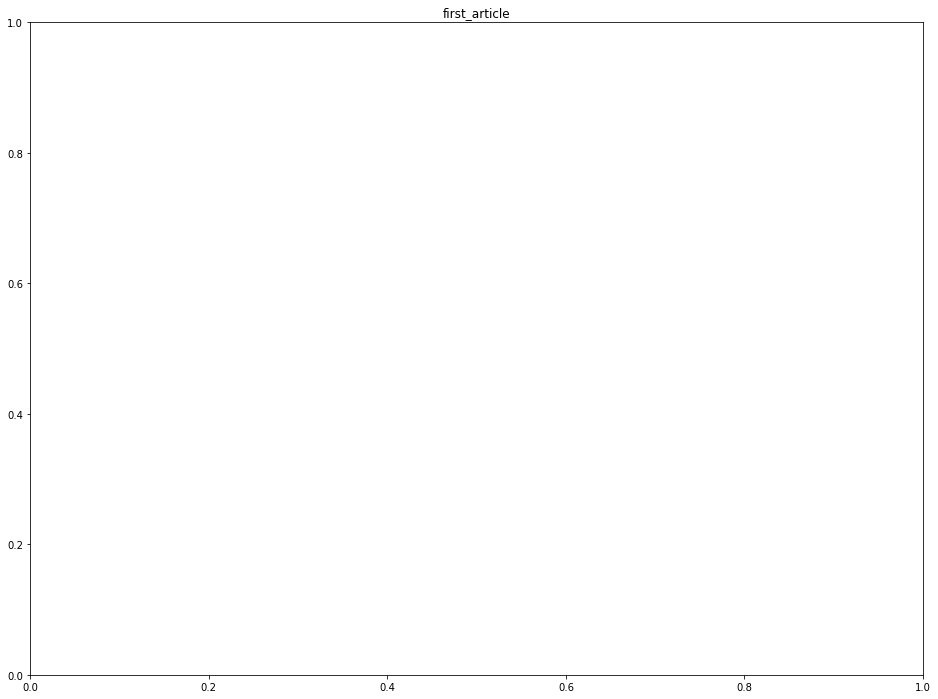

In [38]:
# plt.figure(figsize=(16, 12))
# plt.title("first_article")
# plt.imshow(wc.generate(text1))

In [41]:
#날짜별 단어로 쪼개기
def label_date(df):
    result = pd.DataFrame(columns=["date", "words"])
    for i in range(len(df)):
        temp = pd.DataFrame(df.iloc[i]["clear_words"], columns=["words"])
        temp["date"] = df.iloc[i]["date"]
        result = pd.concat([result, temp])
    
    return result

In [43]:
dw = label_date(df[["date","clear_words"]])
dw

,date,words
0,2022-05-12 00:00:00,
1,2022-05-12 00:00:00,(president
2,2022-05-12 00:00:00,ceo
3,2022-05-12 00:00:00,ogawa)
4,2022-05-12 00:00:00,developed
...,...,...
310,2021-10-27 00:00:00,pictured
311,2021-10-27 00:00:00,proterra
312,2021-10-27 00:00:00,batteries
313,2021-10-27 00:00:00,


In [44]:
dw['words'].str[0:]

0                
1      (president
2             ceo
3          ogawa)
4       developed
          ...    
310      pictured
311      proterra
312     batteries
313              
314              
Name: words, Length: 11812, dtype: object

In [46]:
#words 특수문자 제거
dw['words'] = dw['words'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
dw['words']

0                
1       president
2             ceo
3          ogawa 
4       developed
          ...    
310      pictured
311      proterra
312     batteries
313              
314              
Name: words, Length: 11812, dtype: object

In [49]:
dw['words'] = dw['words'].str.strip()

In [56]:
dw.head()

,date,words
0,2022-05-12 00:00:00,
1,2022-05-12 00:00:00,president
2,2022-05-12 00:00:00,ceo
3,2022-05-12 00:00:00,ogawa
4,2022-05-12 00:00:00,developed


In [64]:
stop_words_list

['a',
 'but',
 'during',
 'hows',
 "it's",
 'said',
 'this',
 'we’re',
 'who’ve',
 'about',
 'by',
 'each',
 'however',
 'it’s',
 'says',
 'those',
 "we've",
 'whove',
 'above',
 'can',
 'either',
 'i',
 'its',
 'see',
 'through',
 'we’ve',
 'will',
 'across',
 "can't",
 'for',
 "i'd",
 "let's",
 'she',
 'to',
 'weve',
 'with',
 'after',
 'can’t',
 'from',
 'i’d',
 'let’s',
 "she'd",
 'too',
 'were',
 'within',
 'all',
 'cant',
 'given',
 "i'll",
 'lets',
 'she’d',
 'towards',
 'what',
 'without',
 'along',
 'cannot',
 'had',
 'i’ll',
 'may',
 'shed',
 'under',
 "what's",
 "won't",
 'also',
 'could',
 'has',
 "i'm",
 'me',
 "she'll",
 'until',
 'what’s',
 'won’t',
 'am',
 "couldn't",
 'have',
 'i’m',
 'more',
 'she’ll',
 'us',
 'whats',
 'would',
 'an',
 'couldn’t',
 'having',
 'im',
 'most',
 'shell',
 'use',
 'when',
 "wouldn't",
 'and',
 'couldnt',
 'he',
 "i've",
 'much',
 'should',
 'used',
 "when's",
 'wouldn’t',
 'any',
 'did',
 "he'd",
 'i’ve',
 'must',
 'since',
 'uses',
 'whe

In [61]:
# 불용어 처리 함수
def stop_words_out(words):
    result = []
    for w in words:
        if w not in stop_words_list:
            result.append(w)
    return "".join(result)

In [62]:
# dw["words"] = dw["words"].map(stop_words_out)

In [63]:
dw

,date,words
0,2022-05-12 00:00:00,
1,2022-05-12 00:00:00,predent
2,2022-05-12 00:00:00,ceo
3,2022-05-12 00:00:00,ogw
4,2022-05-12 00:00:00,developed
...,...,...
310,2021-10-27 00:00:00,pctured
311,2021-10-27 00:00:00,proterr
312,2021-10-27 00:00:00,bttere
313,2021-10-27 00:00:00,


In [55]:
# 태블로를 위해 내보내기
dw.to_csv('../data/komatsu_date_words.csv', index=False)

In [58]:
# clear_words_list = df['clear_words'].to_list()
# clear_title_words_list = df['clear_title_words'].to_list()

In [59]:
# clear_words_txt = ''.join(map(str, clear_words_list))

In [60]:
# clear_title_words_txt = ''.join(map(str, clear_title_words_list))

In [61]:
# # 특수문자 제거
# import re
# word_list = re.findall('[a-zA-Z0-9]+',clear_words_txt)

In [62]:
# pd.Series(word_list).value_counts()

Komatsu       610
s             202
business      149
equipment     130
new           122
             ... 
KPI             1
Guaranteed      1
ICMA            1
Market          1
3072            1
Length: 4103, dtype: int64

In [63]:
# pd.Series(title_word_list).value_counts()

Komatsu         39
Business        12
Results         11
Fiscal           9
Notice           9
                ..
USD              1
Linked           1
achievement      1
accelerating     1
entry            1
Length: 457, dtype: int64

In [65]:
# 태블로를 위한 문자열 파일 완성
# pd.Series(word_list).to_csv('komatsu_word_list.csv')
# pd.Series(title_word_list).to_csv('komatsu_title_word_list.csv')